<a href="https://colab.research.google.com/github/hrshtmlng/DL-Projects/blob/main/ANN_Churn_Rate_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
import pandas as pd
import os

# Load the CSV file
df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis=1,inplace=True)
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [5]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['gender','Partner','Dependents','PhoneService','PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
  df[col] = le.fit_transform(df[col])

In [7]:
df = pd.get_dummies(df,columns=[
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaymentMethod'],drop_first=True)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2,random_state=42)


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [10]:
model = models.Sequential([
    layers.Dense(32,activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5703 - loss: 0.6722 - val_accuracy: 0.7867 - val_loss: 0.4419
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7980 - loss: 0.4371 - val_accuracy: 0.8098 - val_loss: 0.4121
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7947 - loss: 0.4243 - val_accuracy: 0.8169 - val_loss: 0.4082
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8043 - loss: 0.4061 - val_accuracy: 0.8213 - val_loss: 0.4035
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.4161 - val_accuracy: 0.8178 - val_loss: 0.4035
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4148 - val_accuracy: 0.8160 - val_loss: 0.4018
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8022 - loss: 0.4089 - val_accuracy: 0.8169 - val_loss: 0.4057
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.4174 - val_accuracy: 0.

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.767590618336887
Confusion Matrix:
 [[909 124]
 [203 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.58      0.46      0.51       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407



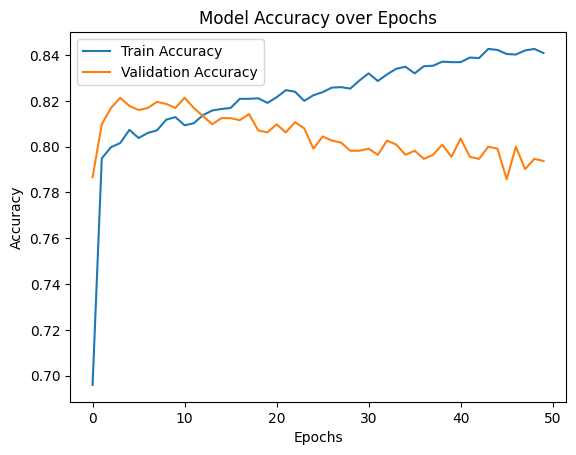

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
